Practical - 7 : Implementation of K-Means Clustering algorithm on text.

In [1]:
# Import libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Sample documents
documents = [
    "NLP is used in chatbots and sentiment analysis.",
    "Support vector machines perform well in classification.",
    "India won the cricket match yesterday.",
    "Virat Kohli scored a century in the World Cup.",
    "New AI models are transforming the tech industry.",
    "Football and cricket are the most popular sports in India.",
    "GPU acceleration helps train deep learning models.",
    "Sachin Tendulkar is a legendary cricket player.",
    "The final match of the IPL was thrilling and close.",
    "Text classification is a common NLP task."
]

In [3]:
# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents)

In [4]:
# Apply K-Means Clustering
k = 2  # You can try k=3 or more for experiments
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [5]:
# Print cluster labels
print("🔹 Cluster labels for each document:")
for i, label in enumerate(model.labels_):
    print(f"Doc {i+1}: Cluster {label}")

🔹 Cluster labels for each document:
Doc 1: Cluster 1
Doc 2: Cluster 1
Doc 3: Cluster 1
Doc 4: Cluster 0
Doc 5: Cluster 1
Doc 6: Cluster 1
Doc 7: Cluster 1
Doc 8: Cluster 1
Doc 9: Cluster 1
Doc 10: Cluster 1


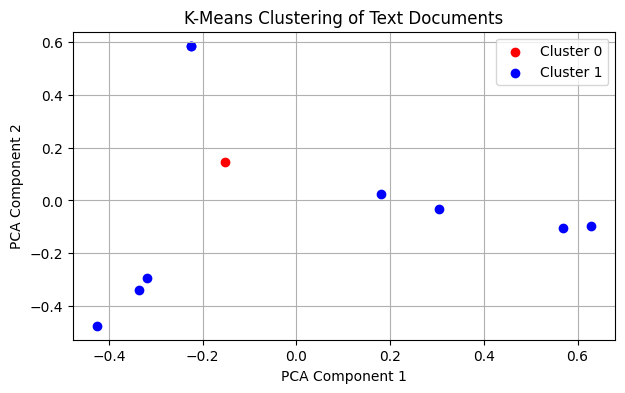

In [8]:
# Visualize Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(7, 4))
colors = ['red', 'blue', 'green']
for i in range(k):
    plt.scatter(
        X_pca[model.labels_ == i, 0],
        X_pca[model.labels_ == i, 1],
        label=f'Cluster {i}',
        color=colors[i % len(colors)]
    )

plt.title("K-Means Clustering of Text Documents")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()